# **Conjunto de dados e distribuição de frequência**

O conjunto de dados a seguir lista os preços (em dólares) de 30 aparelhos
GPS (global positioning system) portáteis. A distribuição de frequência deve ter sete classes.

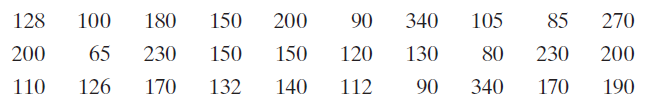

In [2]:
import pandas as pd
from math import ceil
# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])

# Valores máximo, mínimo e número de classes
v_max = data.max()
v_min = data.min()
n_classes = 7
# Distribuição de frequência
dist_freq = data.value_counts(bins=7).sort_index()
# Reconfiguração do conjunto de dados: Series para DataFrame
nova_dist_freq = pd.DataFrame(dist_freq)
nova_dist_freq = nova_dist_freq.reset_index()
nova_dist_freq.columns = ['Classe', 'Frequência']
# Cálculo da amplitude de classe, com respectivos intervalos de classe
amplitude = round((v_max-v_min)/n_classes)+1
intervalos = pd.interval_range(start=v_min, end=v_max+amplitude, freq=amplitude)
# Atribuição dos intervalos para a coluna Classe
nova_dist_freq['Classe'] = intervalos
# Cálculo dos pontos médios das classe
pts_medios = [inter.mid for inter in intervalos]
# Inserção da coluna Pontos médios
nova_dist_freq['Pontos médios'] = pts_medios
# Cálculo e inserção das colunas de frequência relativa e acumulada
observacoes = len(data)
nova_dist_freq['Frequência relativa'] = nova_dist_freq['Frequência']/observacoes
nova_dist_freq['Frequência acumulada'] = nova_dist_freq['Frequência'].cumsum()
nova_dist_freq

,Classe,Frequência,Pontos médios,Frequência relativa,Frequência acumulada
0,"(65, 105]",6,85.0,0.200000,6
1,"(105, 145]",9,125.0,0.300000,15
2,"(145, 185]",6,165.0,0.200000,21
3,"(185, 225]",4,205.0,0.133333,25
4,"(225, 265]",2,245.0,0.066667,27
5,"(265, 305]",1,285.0,0.033333,28
6,"(305, 345]",2,325.0,0.066667,30


# **Construção do histograma de frequência relativa**

A estratégia de construção é a mesma daquela utilizada para o histograma de frequência (absoluta). O histograma é construído usando o método hist do Pandas. A novidade é o uso do parâmetro weights, para a construção do eixo vertical calibrado em frequências relativas. Diversas características do histograma, tais como as classes (parâmetro bins), cor das barras e marcações nos eixos vertical e horizontal são programáveis. Também é inserida a frequência relativa observada no topo de cada barra.

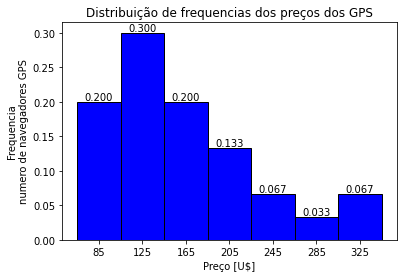

In [3]:
# Construção do histograma
import numpy as np
from math import ceil
### Seu código aqui
histograma = data.hist(bins=[inter.left for inter in intervalos] +
                       [nova_dist_freq['Classe'][n_classes - 1].right],
                       color='blue', edgecolor='black', grid=False,
                       weights=np.ones_like(data)/observacoes)
# Inserção de atributos ao gráfico
### Seu código aqui
histograma.set(xlabel = 'Preço [U$]',
               ylabel = 'Frequencia\nnumero de navegadores GPS',
               title = 'Distribuição de frequencias dos preços dos GPS',
               xticks = nova_dist_freq['Pontos médios'])
# Inserção de rótulos nas barras do histograma
barras = histograma.patches
freqs = nova_dist_freq['Frequência relativa']
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    texto_freq = f'{freq:.3f}'
    histograma.text(barra.get_x()+barra.get_width()/2, altura,
                    texto_freq, ha='center', va='bottom')

# **Construção do histograma de frequência relativa com escala vertical expressa em porcentagem**

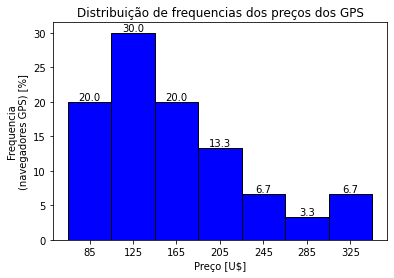

In [4]:
# Outra opção: Escala vertical calibrada em porcentagem
### Seu código aqui
histograma_perc = data.hist(bins=[inter.left for inter in intervalos] +
                       [nova_dist_freq['Classe'][n_classes - 1].right],
                       color='blue', edgecolor='black', grid=False,
                       weights=np.ones_like(data)*100/observacoes)
# Inserção de atributos ao gráfico
### Seu código aqui
histograma_perc.set(xlabel = 'Preço [U$]',
               ylabel = 'Frequencia\n(navegadores GPS) [%]',
               title = 'Distribuição de frequencias dos preços dos GPS',
               xticks = nova_dist_freq['Pontos médios'])
# Inserção de rótulos nas barras do histograma
barras = histograma_perc.patches
freqs = nova_dist_freq['Frequência relativa']
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    texto_freq = f'{freq*100:.1f}'
    histograma_perc.text(barra.get_x()+barra.get_width()/2, altura,
                         texto_freq, ha='center', va='bottom')

# **Construção da ogiva (gráfico de frequência acumulada)**

Para construir o polígono de frequências, vamos empregar a biblioteca matplotlib.

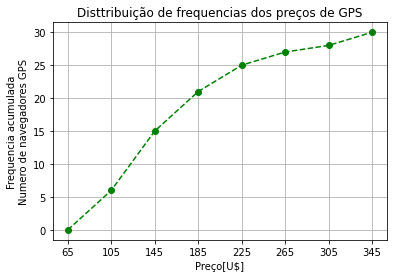

In [5]:
import matplotlib.pyplot as plt
# Construção dos dados
### Seu código aqui
fic_left = [nova_dist_freq['Classe'][0].left]
x_data = fic_left + [extremo.right for extremo in nova_dist_freq['Classe']]
y_data = [0] + list(nova_dist_freq['Frequência acumulada'])
# Plotagem da ogiva, com diversos atributos
### Seu código aqui
plt.plot(x_data, y_data, 'go--')
plt.xlabel('Preço[U$]')
plt.ylabel('Frequencia acumulada\nNumero de navegadores GPS')
plt.title('Disttribuição de frequencias dos preços de GPS')
plt.xticks(x_data)
plt.grid()

# **Construindo um gráfico de pizza**
O gráfico setorial (circular), ou gráfico de pizza, é criado usando o método pie (torta) do matplotlib. O conjunto de dados é criado usando o Pandas, sendo os valores das colunas representados como lista de listas. 

,Título,Frequencia
0,Tecnólogo,942
1,Bacharelado,1716
2,Mestrado,731
3,Doutorado,164


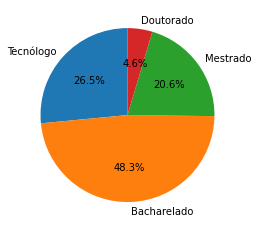

In [6]:
# Criação do conjunto de dados
### Seu código aqui
dados = [
    ['Tecnólogo', 942], 
    ['Bacharelado', 1716], 
    ['Mestrado', 731], 
    ['Doutorado', 164]
         ]
tabela = pd.DataFrame(dados, columns = ['Título', 'Frequencia'])
display(tabela)

# Gráfico de pizza
### Seu código aqui
pizza = plt.pie(tabela['Frequencia'], labels = tabela['Título'],
                autopct = '%1.1f%%', startangle = 90)


# **Construindo um gráfico de Pareto**
Note que o conjunto de dados é criado novamente usando o Pandas, porém empregando um dicionário para representar a coluna de valores. Também será incluída a representação de porcentagem acumulada.

,Valores,PorcAcum
Roubo\nfuncionários,15.1,43.895349
Roubo\nlojas,12.3,79.651163
Erro\nAdm,4.2,91.860465
Fraude\nvendas,1.7,96.802326
Desconhecida,1.1,100.000000


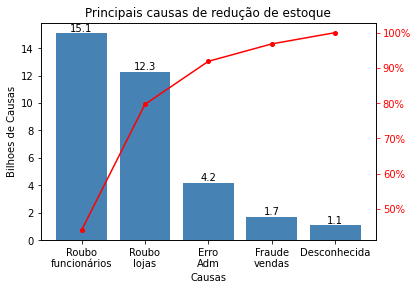

In [7]:
# Criação do conjunto de dados
dados = pd.DataFrame({'Valores': [4.2, 15.1, 12.3, 1.1, 1.7]})
dados.index = ['Erro\nAdm', 'Roubo\nfuncionários',
               'Roubo\nlojas', 'Desconhecida', 'Fraude\nvendas']
# Organizando os dados em ordem decrescente
### Seu código aqui
dados = dados.sort_values(by='Valores', ascending=False)
# Criando a coluna da porcentagem acumulada
### Seu código aqui
dados['PorcAcum'] = dados['Valores'].cumsum() / dados['Valores'].sum()*100
display(dados)
# Criação do gráfico de Pareto
from matplotlib.ticker import PercentFormatter
# Definição das cores
cor_barra = 'steelblue'
cor_linha = 'red'
tam_linha = 4
# Construindo o gráfico básico (gráfico de barras)
### Seu código aqui
fig, pareto = plt.subplots()
pareto.bar(dados.index, dados['Valores'], color=cor_barra)
pareto.set(xlabel='Causas',
           ylabel='Bilhoes de Causas',
           title='Principais causas de redução de estoque')
# Inserção de rótulos nas barras do gráfico de Pareto
barras = pareto.patches
valores = dados['Valores']
for barra, valor in zip(barras, valores):
    altura = barra.get_height()
    pareto.text(barra.get_x()+barra.get_width()/2, altura,
                valor, ha='center', va='bottom')
# Adicionando linha de porcentagem acumulada
### Seu código aqui
linha = pareto.twinx()
linha.plot(dados.index, dados['PorcAcum'], 
           color=cor_linha, marker='o', ms=tam_linha)
linha.yaxis.set_major_formatter(PercentFormatter())
linha.tick_params(axis='y', colors = cor_linha)

# **Dados emparelhados - Diagrama de dispersão**
O conjunto de dados Íris de Fisher, elaborado pelo estatístico britânico Ronald Fisher, será utilizado como exemplo. Esse conjunto de dados descreve várias características físicas, tais como o comprimento e a largura das pétalas (em centímetros), para três espécies da flor íris. O arquivo iris.csv deve ser importado para o notebook. Para isso. acesse o ícone "Arquivo" no menu à esquerda e faça o upload do arquivo (que está na pasta Aula 03 no Open LMS).

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


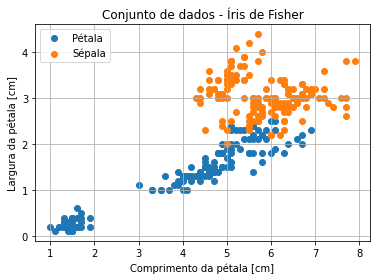

In [8]:
# Leitura do conjunto de dados
### Seu código aqui
iris = pd.read_csv('iris.csv')
display(iris.head())
# Construção do diagrama de dispersão
### Seu código aqui
plt.scatter(iris['petallength'], iris['petalwidth'])
plt.scatter(iris['sepallength'], iris['sepalwidth'])
plt.xlabel('Comprimento da pétala [cm]')
plt.ylabel('Largura da pétala [cm]')
plt.title('Conjunto de dados - Íris de Fisher')
plt.legend(['Pétala', 'Sépala'])
plt.grid()

# **Dados emparelhados - Séries Temporais**
A tabela a seguir lista o número de assinantes de telefonia celular (em milhões) e o valor médio mensal da conta dos assinantes pelo serviço (em dólares) para os anos de 2002 a 2012 (Fonte: Cellular Telecommunications & Internet Association).

Vamos construir representações gráficas das séries temporais do número de assinantes e do ticket médio da assinatura do serviço de telefonia celular.

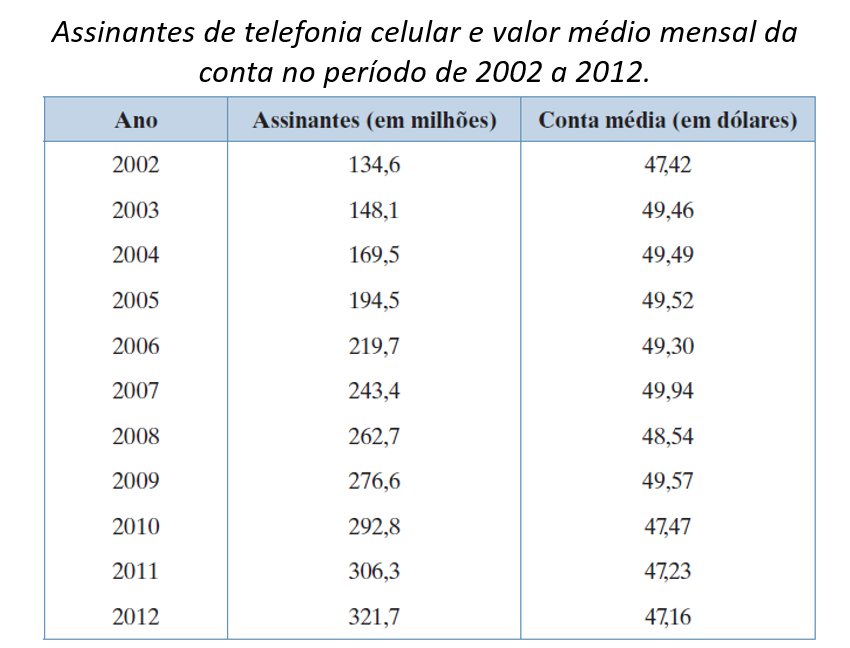


,Assinantes,Conta média
2002,134.6,47.42
2003,148.1,49.46
2004,169.5,49.49
2005,194.5,49.52
2006,219.7,49.30
2007,243.4,49.94
2008,262.7,48.54
2009,276.6,49.57
2010,292.8,47.47
2011,306.3,47.23


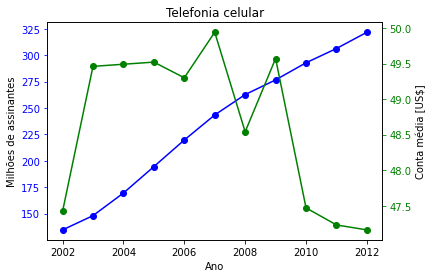

In [9]:
# Criação do conjunto de dados
dados = pd.DataFrame({'Assinantes': [134.6, 148.1, 169.5, 194.5, 219.7, 243.4,
                                     262.7, 276.6, 292.8, 306.3, 321.7],
                      'Conta média':[47.42, 49.46, 49.49, 49.52, 49.30, 49.94,
                                     48.54, 49.57, 47.47, 47.23, 47.16]})
dados.index = list(range(2002, 2013))
display(dados)
# Séries temporais
### Seu código aqui
fig, assinantes = plt.subplots()
assinantes.plot(dados.index, dados['Assinantes'], 'bo-')
assinantes.set(xlabel='Ano',
           ylabel='Milhões de assinantes',
           title = 'Telefonia celular')
assinantes.tick_params(axis='y', colors='blue')
conta = assinantes.twinx()
conta.plot(dados.index, dados['Conta média'], 'go-')
conta.set(ylabel='Conta média [US$]')
conta.tick_params(axis='y', colors='green')